In [1]:
__author__ = "Uwe Graichen"
__copyright__ = "Copyright 2018-2019, Uwe Graichen"
__credits__ = ["Uwe Graichen"]
__license__ = "BSD-3-Clause"
__version__ = "1.1.2"
__maintainer__ = "Uwe Graichen"
__email__ = "uwe.graichen@tu-ilmenau.de, uwe.graichen@kl.ac.at"
__status__ = "Release"

In [2]:
#set_matplotlib_formats('png')
%config InlineBackend.figure_formats = ['png']

# Introduction to spatial harmonic analysis of EEG data using SpharaPy

Training course 4: EEG/MEG - Spatial filters and uncertainty analysis

4th International BaCI Conference 2019

Uwe Graichen, TU Ilmenau, BMTI

Chengdu, 2019/09/11

## Spatial Fourier analysis - Motivation

<img src="images/2D_Fourier_Example.svg.png" alt="2DFourier" style="width: 100%;"/>

- Fourier analysis is a standard tool in digital signal and image processing
    - Filtering, Data compression
    - Compressed Sensing, Acceleration of processing, ...
- Common digital images: flat domain, sampling points on Cartesian or rectangular grid
- For 2D Fourier transform on a Cartesian grid, Fourier basis is given inherently
$F[k,l] = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f[m,n] \cdot
      \color{red}{\mathrm{e}^{-2\pi \mathrm{i} \cdot \left(\frac{mk}{M}  +
            \frac{nl}{N} \right) }}$

## Spatial Fourier analysis - EEG Data

<img src="images/EEG_image-1.png" alt="EEG_image" style="width: 90%;"/>

- Common digital images:
    - flat domain
    - sampling points on Cartesian or rectangular grid
- Diskret sampled potential distribution:
    - curved domain
    - irregular sampling data (sample points are not on Cartesian grid)
    - Fourier basis cannot be given inherently $F[k,l] = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f[m,n] \cdot
      \color{red}{{\text{<suitable Fourier basis>}}}$ 


## Spatial Fourier analysis - 2D image data
- $$F[k,l] = \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} f[m,n] \cdot
      \color{red}{\mathrm{e}^{-2\pi \mathrm{i} \cdot \left(\frac{mk}{M}  +
            \frac{nl}{N} \right) }}$$
- Fourier basis (a set of harmonic functions) is solution of Laplacian eigenvalue problem (Helmholtz equation) $$L \vec{x} = \lambda \vec{x}$$
- $L \in \mathbb{R}^{M \times N}$ discrete Laplace(-Beltrami) operator of the image domain, matrix notation
- $\vec{x}$ eigenvector, harmonic function (basis function)
- $\lambda$ eigenvalue, natural frequency

## Generalization of spatial Fourier analysis

<img src="images/Sensor_tria_mesh-1.png" alt="EEG_image" style="width: 90%;"/>

- Triangulation of sensor positions
- Definition of a discrete Laplace(-Beltrami) operator for triangular mesh, Laplace matrix $L$
- Solving the Laplacian eigenvalue problem $$L \vec{x} = \lambda \vec{x}$$
- Eigenvectors form a harmonic, orthonormal basis, applicable for spatial Fourier analysis
- **SPHARA** – **SP**atial **HAR**monic **A**nalysis

## Generalization of spatial Fourier analysis

- Solving the Laplacian eigenvalue problem $$L \vec{x} = \lambda \vec{x}$$
- Eigenvectors form a harmonic, orthonormal basis, applicable for spatial Fourier analysis

<img src="images/Low_frequ_bf-1.png" alt="Low_freq_bf" style="width: 90%;"/>

- **SPHARA** – **SP**atial **HAR**monic **A**nalysis

## SpharaPy

- Python implementation of a new approach for spatial harmonic analysis (SPHARA)
- SpharaPy Python toolbox provides classes and functions:
    - to compute the SPHARA BF
    - for data analysis and synthesis
    - to design and apply spatial filters
<img src="images/Class_diag.png" alt="Class_diagram" style="width: 80%;"/>

## Import the SpharaPy Python packages

- At the beginning we import three modules of the SpharaPy package as well as several other packages and single functions from packages.

In [3]:
# import modules from spharapy package
import spharapy.trimesh as tm
import spharapy.spharatransform as st
import spharapy.spharafilter as sf
import spharapy.datasets as sd

# import additional modules used in this tutorial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from matplotlib.text import Text
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle, Rectangle
import numpy as np

## Load example data set

- SEP data of a single subject recorded with a 256 channel EEG system with equidistant layout
- The data set is one of the example data sets contained in the SpharaPy toolbox

In [4]:
# loading the 256 channel EEG dataset from spharapy sample datasets
data_in = sd.load_eeg_256_channel_study()

- The dataset includes lists of vertices, triangles, and sensor labels, as well as EEG data (somatosensory-evoked potentials SEP)

In [5]:
print(data_in.keys())

dict_keys(['vertlist', 'trilist', 'labellist', 'eegdata'])


## Load example data set

- Triangulation, 256 vertices and 482 triangles
- 256 channels and 369 time samples, 50 ms before to 130 ms after stimulation
- Sampling frequency is 2048 Hz.

In [6]:
vertlist = np.array(data_in['vertlist'])
trilist = np.array(data_in['trilist'])
eegdata = np.array(data_in['eegdata'])
print('vertices = ', vertlist.shape)
print('triangles = ', trilist.shape)
print('eegdata = ', eegdata.shape)

vertices =  (256, 3)
triangles =  (482, 3)
eegdata =  (256, 369)


## Example data set

- Visualization of triangulated sensor setup

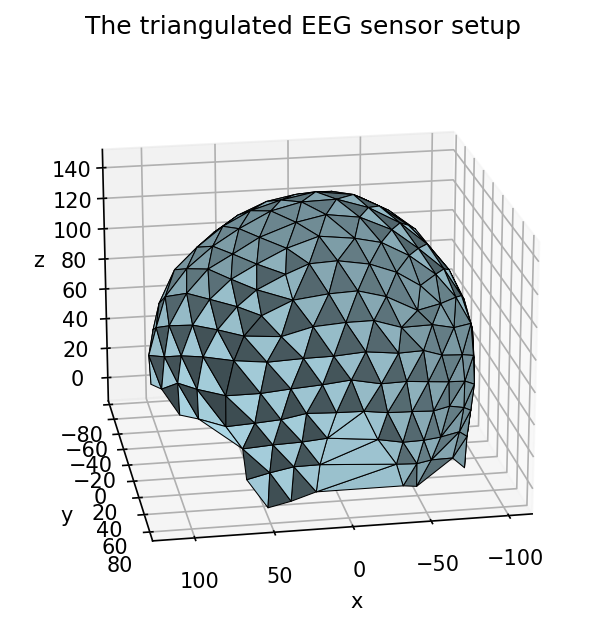

In [23]:
fig = plt.figure(dpi = 150)
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('The triangulated EEG sensor setup')
ax.view_init(elev=20., azim=80.)
ax.set_aspect('auto')

ax.plot_trisurf(vertlist[:, 0], vertlist[:, 1], vertlist[:, 2],
                triangles=trilist, color='lightblue', edgecolor='black',
                linewidth=0.5, shade=True)
plt.show()

## Example data set

- Visualization of the averaged SEP data as a butterfly plot. The components P14, N20 and N30 are marked by red, blue and green vertical lines

In [24]:
x = np.arange(-50, 130, 1/2.048)
figeeg = plt.figure(dpi = 150)
axeeg = figeeg.gca()
axeeg.axvline(13, color='red')
axeeg.axvline(19, color='blue')
axeeg.axvline(30, color='green')
axeeg.plot(x, eegdata[:, :].transpose())
axeeg.set_xlabel('t/ms')
axeeg.set_ylabel('V/µV')
axeeg.set_title('SEP data')
axeeg.set_ylim(-3.5, 3.5)
axeeg.set_xlim(-50, 130)
axeeg.grid(True)
plt.show()

## SPHARA analysis of EEG data
### Create a SpharaPy TriMesh instance

In [25]:
# create an instance of the TriMesh class
mesh_eeg = tm.TriMesh(trilist, vertlist)

### Create a SpharaPy SpharaTransform instance

In [26]:
sphara_transform_fem = st.SpharaTransform(mesh_eeg, 'fem')
basis_functions_fem, natural_frequencies_fem \
    = sphara_transform_fem.basis()

### Visualization the basis functions

- The first 12 spatially low-frequency SPHARA BF of the basis used for the transform

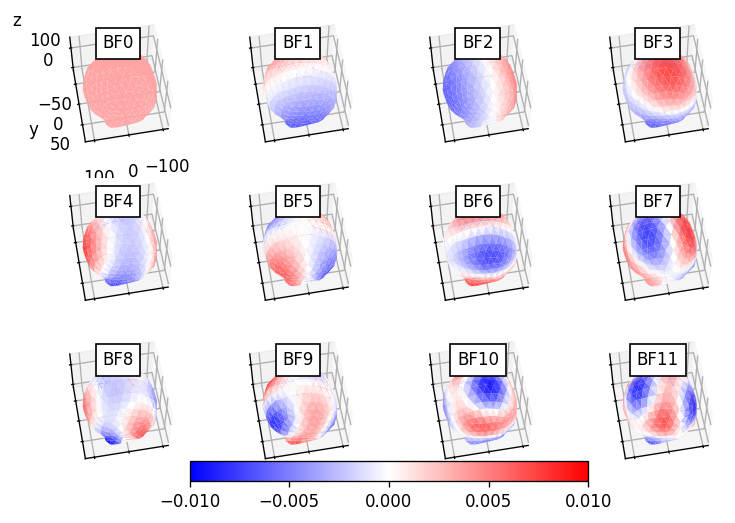

In [27]:
figsb1, axes1 = plt.subplots(nrows=3, ncols=4, figsize=(6.0, 4.4),dpi = 120,
                             subplot_kw={'projection': '3d'})
for i in range(np.size(axes1)):
    colors = np.mean(basis_functions_fem[trilist, i + 0], axis=1)
    ax = axes1.flat[i]
    if i == 0:
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])
    ax.view_init(elev=60., azim=80.)
    ax.set_aspect('auto')
    ax.add_artist(AnchoredText('BF' + str(i), frameon=True, loc='upper center'))
    # ax.text2D(0, 0.8, 'local max')
    trisurfplot = ax.plot_trisurf(vertlist[:, 0], vertlist[:, 1],
                                  vertlist[:, 2], triangles=trilist,
                                  cmap=plt.cm.bwr,
                                  edgecolor='white', linewidth=0.)
    trisurfplot.set_array(colors)
    trisurfplot.autoscale()
    trisurfplot.set_clim(-0.01, 0.01)

cbar = figsb1.colorbar(trisurfplot, ax=axes1.ravel().tolist(), shrink=0.95,
                       orientation='horizontal', fraction=0.05, pad=0.05,
                       anchor=(0.45, 0))

plt.subplots_adjust(left=0.0, right=1.0, bottom=0.15, top=1.0, wspace=0.0, hspace=0.2)
plt.show()

### SPHARA transform of the EEG data

<img src="images/scheme_sphara_decomposition.svg" alt="SPHARA_Decomp" style="width: 100%;"/>

### SPHARA transform of the EEG data

<img src="images/scheme_sphara_decomposition2.svg" alt="SPHARA_Decomp" style="width: 100%;"/>

### SPHARA transform of the EEG data

- Perform the SPHARA transformation of the EEG data

In [28]:
# perform the SPHARA transform
sphara_trans_eegdata = \
    sphara_transform_fem.analysis(eegdata.transpose())

### SPHARA transform of the EEG data

- Butterfly plot of all channels of the EEG
- Power contributions of the first 60 SPHARA basis functions

In [29]:
# 60 low-frequency basis functions are displayed
ysel = 60
figsteeg, (axsteeg1, axsteeg2) = plt.subplots(nrows=2, figsize=(6.0, 5.0), dpi = 100)

y = np.arange(0, ysel)
x = np.arange(-50, 130, 1/2.048)

axsteeg1.axvline(13, color='red')
axsteeg1.axvline(19, color='blue')
axsteeg1.axvline(30, color='green')
axsteeg1.plot(x, eegdata[:, :].transpose())
axsteeg1.set_ylabel('V/µV')
axsteeg1.set_title('EEG data, 256 channels')
axsteeg1.set_ylim(-2.5, 2.5)
axsteeg1.set_xlim(-50, 130)
axsteeg1.grid(True)
axsteeg1.add_artist(AnchoredText("a", frameon=True, loc='upper left'))

pcm2 = axsteeg2.pcolormesh(x, y,
                          np.square(np.abs(sphara_trans_eegdata.transpose()
                                           [0:ysel, :])),
                         norm=LogNorm(vmin=0.1,vmax=50000),
                         linewidth=0.0,rasterized=True)
axsteeg2.set_xlabel('t/ms')
axsteeg2.set_ylabel('# BF')
axsteeg2.set_title('Power contribution of SPHARA basis functions')
axsteeg2.grid(True)
axsteeg2.add_artist(AnchoredText("b", frameon=True, loc='upper left'))
axsteeg2.add_artist(AnchoredText("logarithmic color map", frameon=True, loc='upper right'))
figsteeg.colorbar(pcm2, ax=[axsteeg2], shrink=0.9,
                  anchor=(0.85, 0.0), label='power / a.u.')

plt.subplots_adjust(left=0.1, right=0.85, bottom=0.1, top=0.95, hspace=0.3)
plt.show()

## SPHARA filter using FEM discretisation

### Create a SpharaPy SpharaFilter instance

- Determine an instance of the class SpharaFilter, which is used to execute the spatial filtering
- use a Laplace-Beltrami operator, which is discretized by the FEM approach

In [30]:
sphara_filter_fem = sf.SpharaFilter(mesh_eeg, mode='fem',
                                    specification=20)

### SPHARA filtering of the EEG data

<img src="images/scheme_sphara_filtering.svg" alt="SPHARA_Filter" style="width: 100%;"/>

### SPHARA filtering of the EEG data

- Perform the SPHARA filtering of the EEG data

In [31]:
# perform the SPHARA filtering
sphara_filt_eegdata = \
    sphara_filter_fem.filter(eegdata.transpose()).transpose()

### SPHARA filtering of the EEG data

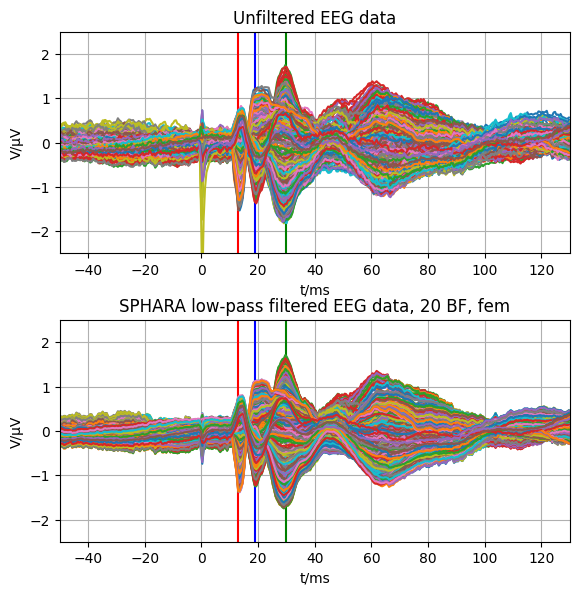

In [32]:
figsteeg, (axsteeg1, axsteeg2) = plt.subplots(nrows=2, figsize=(6.0, 6.0), dpi = 100)

axsteeg1.axvline(13, color='red')
axsteeg1.axvline(19, color='blue')
axsteeg1.axvline(30, color='green')
axsteeg1.plot(x, eegdata[:, :].transpose())
axsteeg1.set_title('Unfiltered EEG data')
axsteeg1.set_ylabel('V/µV')
axsteeg1.set_xlabel('t/ms')
axsteeg1.set_ylim(-2.5, 2.5)
axsteeg1.set_xlim(-50, 130)
axsteeg1.grid(True)

axsteeg2.axvline(13, color='red')
axsteeg2.axvline(19, color='blue')
axsteeg2.axvline(30, color='green')
axsteeg2.plot(x, sphara_filt_eegdata[:, :].transpose())
axsteeg2.set_title('SPHARA low-pass filtered EEG data, 20 BF, fem')
axsteeg2.set_ylabel('V/µV')
axsteeg2.set_xlabel('t/ms')
axsteeg2.set_ylim(-2.5, 2.5)
axsteeg2.set_xlim(-50, 130)
axsteeg2.grid(True)

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, hspace=0.3)
plt.show()

### SPHARA filtering of the EEG data

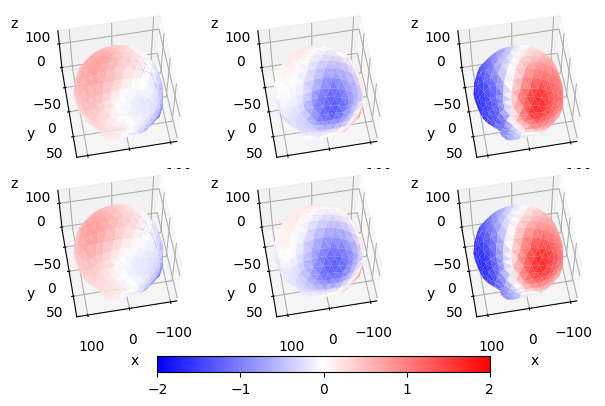

In [33]:
time_pts = [129, 141, 164]
figsf1, axessf1 = plt.subplots(nrows=2, ncols=3, figsize=(6.0, 4.4), dpi = 100,
                               subplot_kw={'projection': '3d'})

for i in range(2):
    for j in range(3):
        if i == 0:
            colorssf1 = np.mean(eegdata[trilist, time_pts[j]], axis=1)
        else:
            colorssf1 = np.mean(sphara_filt_eegdata[trilist, time_pts[j]],
                                axis=1)
        
        axessf1[i, j].set_xlabel('x')
        axessf1[i, j].set_ylabel('y')
        axessf1[i, j].set_zlabel('z')
        axessf1[i, j].view_init(elev=60., azim=80.)
        axessf1[i, j].set_aspect('auto')

        trisurfplot = axessf1[i, j].plot_trisurf(vertlist[:, 0],
                                                 vertlist[:, 1],
                                                 vertlist[:, 2],
                                                 triangles=trilist,
                                                 cmap=plt.cm.bwr,
                                                 edgecolor='white',
                                                 linewidth=0.)
        trisurfplot.set_array(colorssf1)
        trisurfplot.set_clim(-2., 2)

cbar = figsb1.colorbar(trisurfplot, ax=axessf1.ravel().tolist(), shrink=0.85,
                       orientation='horizontal', fraction=0.05, pad=0.05,
                       anchor=(0.5, 0.0))

plt.subplots_adjust(left=0.0, right=1.0, bottom=0.225, top=0.95,
                    wspace=0.0, hspace=0.0)
plt.show()

### Application of SPHARA filter to data with artificial noise

- EEG data are disturbed by white noise with SNR 3dB, 0dB and -3dB
- Spatial low-pass SPHARA filter with 20 basis functions

In [34]:
# vector with noise levels in dB
db_val_vec = [3, 0, -3]

# compute the power of the SEP data
power_sep = np.sum(np.square(np.absolute(eegdata))) / eegdata.size

# compute a vector with standard deviations of the noise
# in relation to signal power for the given noise levels
noise_sd_vec = list(map(lambda db_val: 
                        np.sqrt(power_sep / (10 ** (db_val / 10))),
                        db_val_vec))

# add the noise to the EEG data
eegdata_noise = list(map(lambda noise_sd: eegdata + 
                         np.random.normal(0, noise_sd, [256, 369]),
                         noise_sd_vec))

# filter the EEG data containing the artificial noise
eegdata_noise_filt = list(map(lambda eeg_noise:
                    (sphara_filter_fem.filter(eeg_noise.transpose()).
                     transpose()), eegdata_noise))

### Application of SPHARA filter to data with artificial noise

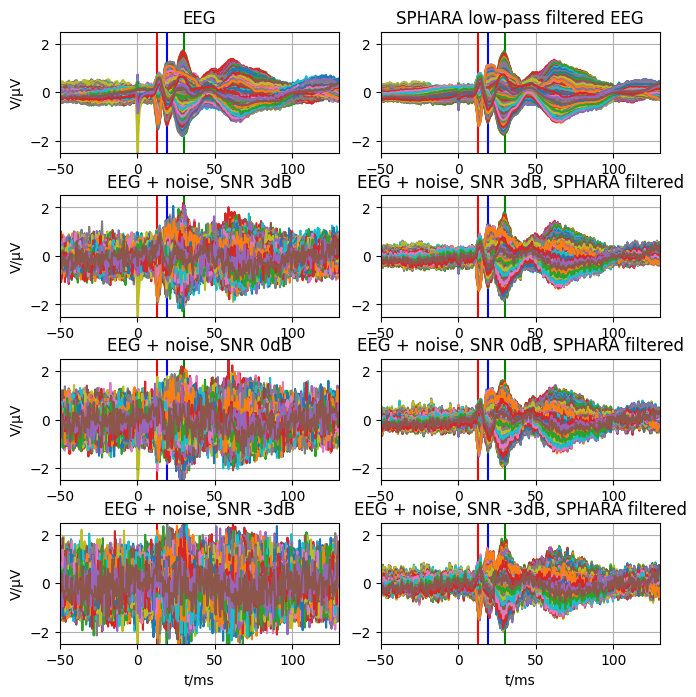

In [35]:
figfilt, axesfilt = plt.subplots(nrows=4, ncols=2, figsize=(6.0, 6.8), dpi = 100)

axesfilt[0, 0].axvline(13, color='red')
axesfilt[0, 0].axvline(19, color='blue')
axesfilt[0, 0].axvline(30, color='green')
axesfilt[0, 0].plot(x, eegdata[:, :].transpose())
axesfilt[0, 0].set_title('EEG')
axesfilt[0, 0].set_ylabel('V/µV')
# axesfilt[0, 0].set_xlabel('t/ms')
axesfilt[0, 0].set_ylim(-2.5, 2.5)
axesfilt[0, 0].set_xlim(-50, 130)
axesfilt[0, 0].grid(True)

axesfilt[0, 1].axvline(13, color='red')
axesfilt[0, 1].axvline(19, color='blue')
axesfilt[0, 1].axvline(30, color='green')
axesfilt[0, 1].plot(x, sphara_filt_eegdata[:, :].transpose())
axesfilt[0, 1].set_title('SPHARA low-pass filtered EEG')
# axesfilt[0, 1].set_ylabel('V/µV')
# axesfilt[0, 1].set_xlabel('t/ms')
axesfilt[0, 1].set_ylim(-2.5, 2.5)
axesfilt[0, 1].set_xlim(-50, 130)
axesfilt[0, 1].grid(True)

for i in range(3):
    axesfilt[i + 1, 0].axvline(13, color='red')
    axesfilt[i + 1, 0].axvline(19, color='blue')
    axesfilt[i + 1, 0].axvline(30, color='green')
    axesfilt[i + 1, 0].plot(x, eegdata_noise[i].transpose())
    
    axesfilt[i + 1, 0].set_title('EEG + noise, SNR ' +
                                 str(db_val_vec[i]) + 'dB')
    axesfilt[i + 1, 0].set_ylabel('V/µV')
    if i == 2:
        axesfilt[i + 1, 0].set_xlabel('t/ms')
    axesfilt[i + 1, 0].set_ylim(-2.5, 2.5)
    axesfilt[i + 1, 0].set_xlim(-50, 130)
    axesfilt[i + 1, 0].grid(True)

    axesfilt[i + 1, 1].axvline(13, color='red')
    axesfilt[i + 1, 1].axvline(19, color='blue')
    axesfilt[i + 1, 1].axvline(30, color='green')
    axesfilt[i + 1, 1].plot(x, eegdata_noise_filt[i].transpose())
    axesfilt[i + 1, 1].set_title('EEG + noise, SNR ' +
                                 str(db_val_vec[i]) + 'dB, SPHARA filtered')
    # axesfilt[i + 1, 1].set_ylabel('V/µV')
    if i == 2:
        axesfilt[i + 1, 1].set_xlabel('t/ms')
    axesfilt[i + 1, 1].set_ylim(-2.5, 2.5)
    axesfilt[i + 1, 1].set_xlim(-50, 130)
    axesfilt[i + 1, 1].grid(True)

plt.subplots_adjust(left=0.0, right=1.0, bottom=0.05, top=0.95, hspace=0.35,
                   wspace=0.15)
plt.show()

### Application of SPHARA filter to data with artificial noise

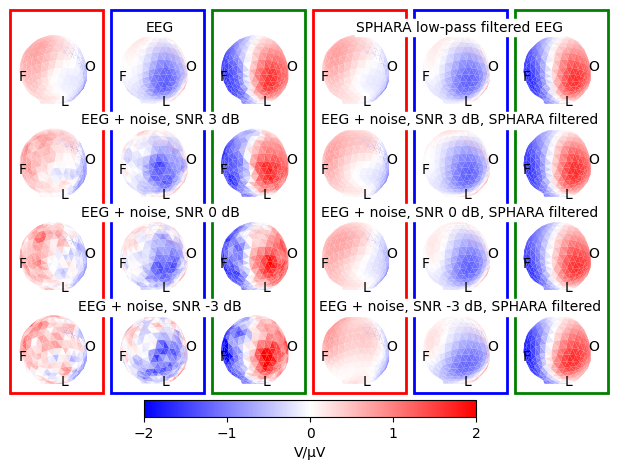

In [36]:
time_pts = [129, 141, 164]
figfilttopo, axesfilttopo = plt.subplots(nrows=4, ncols=6, figsize=(6.0, 4.4),
                                         dpi = 100, subplot_kw={'projection': '3d'})

for i in range(2):
    for j in range(3):

        if i == 0:
            colorssf1 = np.mean(eegdata[trilist, time_pts[j]], axis=1)
        else:
            colorssf1 = np.mean(sphara_filt_eegdata[trilist, time_pts[j]],
                                axis=1)

        #axesfilttopo[0, 3 * i + j].set_xlabel('x')
        #axesfilttopo[0, 3 * i + j].set_ylabel('y')
        #axesfilttopo[0, 3 * i + j].set_zlabel('z')
        axesfilttopo[0, 3 * i + j].view_init(elev=60., azim=80.)
        axesfilttopo[0, 3 * i + j].set_aspect('auto')
        axesfilttopo[0, 3 * i + j].grid(False)
        axesfilttopo[0, 3 * i + j].set_axis_off()
        axesfilttopo[0, 3 * i + j].dist = 6
        axesfilttopo[0, 3 * i + j].text(120,0,10,'F')
        axesfilttopo[0, 3 * i + j].text(-100,0,10,'O')
        axesfilttopo[0, 3 * i + j].text(0,80,10,'L')
        #axesfilttopo[0, 3 * i + j].text(0,-80,10,'R')


        trisurfplot = axesfilttopo[0, 3 * i + j].plot_trisurf(vertlist[:, 0],
                                                              vertlist[:, 1],
                                                              vertlist[:, 2],
                                                              triangles=trilist,
                                                              cmap=plt.cm.bwr,
                                                              edgecolor='white',
                                                              linewidth=0.)
        trisurfplot.set_array(colorssf1)
        trisurfplot.set_clim(-2., 2)
        
for i in range(3):
    for j in range(3):
        color_eeg_noise = np.mean(eegdata_noise[i][trilist, time_pts[j]], axis=1)
        color_eeg_filt = np.mean(eegdata_noise_filt[i][trilist, time_pts[j]], axis=1)
        
        #axesfilttopo[(i + 1), j].set_xlabel('x')
        #axesfilttopo[(i + 1), j].set_ylabel('y')
        #axesfilttopo[(i + 1), j].set_zlabel('z')
        axesfilttopo[(i + 1), j].view_init(elev=60., azim=80.)
        axesfilttopo[(i + 1), j].set_aspect('auto')
        axesfilttopo[(i + 1), j].grid(False)
        axesfilttopo[(i + 1), j].set_axis_off()
        axesfilttopo[(i + 1), j].dist = 6
        axesfilttopo[(i + 1), j].text(120,0,10,'F')
        axesfilttopo[(i + 1), j].text(-100,0,10,'O')
        axesfilttopo[(i + 1), j].text(0,80,10,'L')
        #axesfilttopo[(i + 1), j].text(0,-80,10,'R')

        
        trisurfplot = axesfilttopo[(i + 1), j].plot_trisurf(vertlist[:, 0],
                                                              vertlist[:, 1],
                                                              vertlist[:, 2],
                                                              triangles=trilist,
                                                              cmap=plt.cm.bwr,
                                                              edgecolor='white',
                                                              linewidth=0.)
        trisurfplot.set_array(color_eeg_noise)
        trisurfplot.set_clim(-2., 2)

        #axesfilttopo[(i + 1), 3 + j].set_xlabel('x')
        #axesfilttopo[(i + 1), 3 + j].set_ylabel('y')
        #axesfilttopo[(i + 1), 3 + j].set_zlabel('z')
        axesfilttopo[(i + 1), 3 + j].view_init(elev=60., azim=80.)
        axesfilttopo[(i + 1), 3 + j].dist=10
        axesfilttopo[(i + 1), 3 + j].set_aspect('auto')
        axesfilttopo[(i + 1), 3 + j].grid(False)
        axesfilttopo[(i + 1), 3 + j].set_axis_off()
        axesfilttopo[(i + 1), 3 + j].dist = 6
        axesfilttopo[(i + 1), 3 + j].text(120,0,10,'F')
        axesfilttopo[(i + 1), 3 + j].text(-100,0,10,'O')
        axesfilttopo[(i + 1), 3 + j].text(0,80,10,'L')
        #axesfilttopo[(i + 1), 3 + j].text(0,-80,10,'R')

        trisurfplot = axesfilttopo[(i + 1), 3 + j].plot_trisurf(vertlist[:, 0],
                                                              vertlist[:, 1],
                                                              vertlist[:, 2],
                                                              triangles=trilist,
                                                              cmap=plt.cm.bwr,
                                                              edgecolor='white',
                                                              linewidth=0.)
        trisurfplot.set_array(color_eeg_filt)
        trisurfplot.set_clim(-2., 2)

cbar = figfilttopo.colorbar(trisurfplot, ax=axesfilttopo.ravel().tolist(), shrink=0.95,
                       orientation='horizontal', label='V/µV', fraction=0.05, pad=0.05,
                       anchor=(0.49, 0.0))

figfilttopo.add_artist(Rectangle((0.010, 0.18), width=0.155, height=0.87, fill=False, color='red', lw=2))
figfilttopo.add_artist(Rectangle((0.178, 0.18), width=0.155, height=0.87, fill=False, color='blue', lw=2))
figfilttopo.add_artist(Rectangle((0.346, 0.18), width=0.155, height=0.87, fill=False, color='green', lw=2))
figfilttopo.add_artist(Rectangle((0.515, 0.18), width=0.155, height=0.87, fill=False, color='red', lw=2))
figfilttopo.add_artist(Rectangle((0.683, 0.18), width=0.155, height=0.87, fill=False, color='blue', lw=2))
figfilttopo.add_artist(Rectangle((0.851, 0.18), width=0.155, height=0.87, fill=False, color='green', lw=2))
figfilttopo.add_artist(Text(x=0.26, y=1.0, text='EEG', ha='center', 
                            bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.76, y=1.0, text='SPHARA low-pass filtered EEG',
                            ha='center', bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.26, y=0.79, text='EEG + noise, SNR 3 dB', ha='center',
                            bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.76, y=0.79, text='EEG + noise, SNR 3 dB, SPHARA filtered',
                            ha='center', bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.26, y=0.58, text='EEG + noise, SNR 0 dB', ha='center',
                            bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.76, y=0.58, text='EEG + noise, SNR 0 dB, SPHARA filtered',
                            ha='center', bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.26, y=0.365, text='EEG + noise, SNR -3 dB', ha='center',
                            bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))
figfilttopo.add_artist(Text(x=0.76, y=0.365, text='EEG + noise, SNR -3 dB, SPHARA filtered',
                            ha='center', bbox=dict(facecolor='white', edgecolor='white', pad=1.0)))

plt.subplots_adjust(left=0.0, right=1.0, bottom=0.2, top=1.0, hspace=0.3,
                   wspace=0.05)

plt.show()

## SpharaPy &ndash; Further useful sources of information
### Publication
- Graichen U., Eichardt R., Fiedler P., Strohmeier D., Zanow F., Haueisen J.
*SPHARA - A generalized spatial Fourier analysis for multi-sensor systems with non-uniformly arranged sensors: Application to EEG*, PLoS One, 10 (2015), pp. 1-22, https://doi.org/10.1371/journal.pone.0121741
- Graichen U., Eichardt R., Haueisen J. *SpharaPy: A Python toolbox for spatial harmonic analysis of non-uniformly sampled data*, SoftwareX, Vol. 10, 2019, https://doi.org/10.1016/j.softx.2019.100289

## SpharaPy &ndash; Further useful sources of information
### Software etc.
- Developer documentation/manual/tutorials: https://spharapy.readthedocs.io/
- Code repository: https://gitlab.com/uwegra/spharapy
- SpharaPy on Python Package Index (PyPI): https://pypi.org/project/SpharaPy/
- This presentation: https://cloud.tu-ilmenau.de/s/Kc3bf9PzA6jBJeE